In [2]:
import pandas as pd
import os
import sys

#Path
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
xdrive_path = os.path.join(parent_dir, 'xdrive')
sys.path.append(xdrive_path)

pipeline_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(pipeline_path)
import get_files_from_xdrive as gxdrive
from imputation import impute_missing_values


In [3]:
df = gxdrive.read_file_from_xdrive_as_df("Prepared_Dataset_left_joint.csv")


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=37897397308-8h2dck33fj91dilfohpi99n9pbuaejt0.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A61647%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=PtEjHdNyuYEZWSQnX07OiZSGL8N3QM&access_type=offline


In [21]:
df

,DateTime,Delivery_Start_Date_Forward_Price,Forward_Price_SE/CW(MWh),Average_Settlement_Price_SE/CW(MWh),Standard_Deviation_Settlement_Price_SE(MWh),Min_Settlement_Price_SE(MWh),Max_Settlement_Price_SE(MWh),Hydro_Inflow_N(MWavg),Hydro_Inflow_NE(MWavg),Hydro_Inflow_S(MWavg),...,Solar_capacity_SE/CW(MWavg),Total_capacity_NE(MWavg),Total_capacity_N(MWavg),Total_capacity_SE/CW(MWavg),Total_capacity_S(MWavg),Consumption(MWh)_N,Consumption(MWh)_NE,Consumption(MWh)_S,Consumption(MWh)_SE/CW,Daily_Sum_Consumption(MWh)
0,2021-04-30,2021-05-01,218.37,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
1,2021-04-30,2021-06-01,322.73,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
2,2021-04-30,2021-07-01,409.43,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
3,2021-04-30,2021-08-01,411.49,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
4,2021-04-30,2021-09-01,411.49,150.84375,15.776727,119.15,186.68,21464.7703,2997.6147,1424.9386,...,858.61000,34834.027233,26703.004,69157.78010,20792.616,144004.8,270040.8,289257.6,923236.8,1626540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69540,2024-10-07,2045-08-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69541,2024-10-07,2045-09-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69542,2024-10-07,2045-10-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6
69543,2024-10-07,2045-11-01,135.29,541.10875,34.498424,493.34,600.48,NaN,NaN,NaN,...,6364.61424,54293.585193,27249.024,77890.16834,21241.884,205005.6,329930.4,323688.0,1102269.6,1960893.6


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

C:\Users\lilla\AppData\Local\Temp\ipykernel_1108\3709425233.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format =True)


<Axes: xlabel='DateTime'>

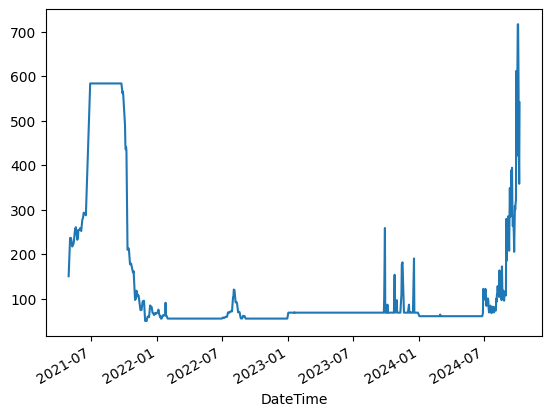

In [23]:
df.set_index('DateTime')['Average_Settlement_Price_SE/CW(MWh)'].plot()

In [24]:
df.columns

Index(['DateTime', 'Delivery_Start_Date_Forward_Price',
       'Forward_Price_SE/CW(MWh)', 'Average_Settlement_Price_SE/CW(MWh)',
       'Standard_Deviation_Settlement_Price_SE(MWh)',
       'Min_Settlement_Price_SE(MWh)', 'Max_Settlement_Price_SE(MWh)',
       'Hydro_Inflow_N(MWavg)', 'Hydro_Inflow_NE(MWavg)',
       'Hydro_Inflow_S(MWavg)', 'Hydro_Inflow_SE/CW(MWavg)',
       'Daily_Sum_Hydro_Inflow(MWavg)', 'Solar_Generated_Sum_NE(MWavg)',
       'Solar_Generated_Sum_SE/CW(MWavg)', 'Solar_Generated_Mean_NE(MWavg)',
       'Solar_Generated_Mean_SE/CW(MWavg)', 'Daily_Sum_Solar_Generated(MWavg)',
       'Wind_Generation_N(MWavg)', 'Wind_Generation_NE(MWavg)',
       'Wind_Generation_S(MWavg)', 'Wind_Generation_SUM(MWavg)',
       'Hydroelectric_capacity_NE(MWavg)', 'Hydroelectric_capacity_N(MWavg)',
       'Hydroelectric_capacity_SE/CW(MWavg)',
       'Hydroelectric_capacity_S(MWavg)', 'Thermal_capacity_NE(MWavg)',
       'Thermal_capacity_N(MWavg)', 'Thermal_capacity_SE/CW(MWavg)',
  

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>], dtype=object)

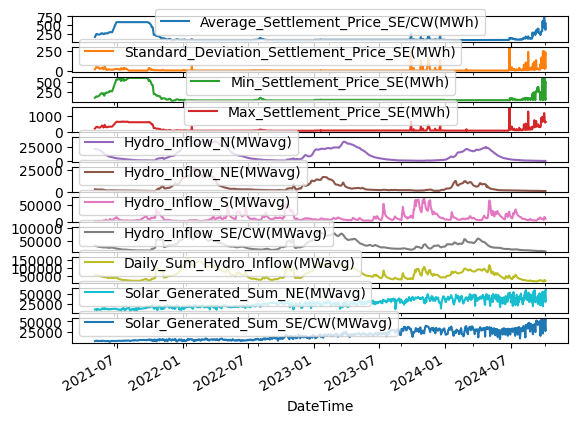

In [27]:
df.set_index('DateTime')[['Average_Settlement_Price_SE/CW(MWh)', 'Standard_Deviation_Settlement_Price_SE(MWh)','Min_Settlement_Price_SE(MWh)', 'Max_Settlement_Price_SE(MWh)',
       'Hydro_Inflow_N(MWavg)', 'Hydro_Inflow_NE(MWavg)',
       'Hydro_Inflow_S(MWavg)', 'Hydro_Inflow_SE/CW(MWavg)',
       'Daily_Sum_Hydro_Inflow(MWavg)', 'Solar_Generated_Sum_NE(MWavg)',
       'Solar_Generated_Sum_SE/CW(MWavg)']].plot(subplots=True)

In [28]:
df.count()

DateTime                                       69545
Delivery_Start_Date_Forward_Price              69545
Forward_Price_SE/CW(MWh)                       69545
Average_Settlement_Price_SE/CW(MWh)            69497
Standard_Deviation_Settlement_Price_SE(MWh)    69497
Min_Settlement_Price_SE(MWh)                   69497
Max_Settlement_Price_SE(MWh)                   69497
Hydro_Inflow_N(MWavg)                          69289
Hydro_Inflow_NE(MWavg)                         69289
Hydro_Inflow_S(MWavg)                          69289
Hydro_Inflow_SE/CW(MWavg)                      69289
Daily_Sum_Hydro_Inflow(MWavg)                  69289
Solar_Generated_Sum_NE(MWavg)                  69545
Solar_Generated_Sum_SE/CW(MWavg)               69545
Solar_Generated_Mean_NE(MWavg)                 69545
Solar_Generated_Mean_SE/CW(MWavg)              69545
Daily_Sum_Solar_Generated(MWavg)               69545
Wind_Generation_N(MWavg)                       69545
Wind_Generation_NE(MWavg)                     

In [ ]:
# Convert DateTime and Delivery_Start_Date_Forward_Price to datetime for proper filtering
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(data['Delivery_Start_Date_Forward_Price'])
